In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv(r"C:\Users\LENOVO\Downloads\airlines_flights_data.csv")

In [6]:
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [8]:
df.isnull().sum()

index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [10]:
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


**Q.1 What are the airlines in the dataset, accompanied by their frequencies?**

In [16]:
df['airline'].value_counts().reset_index(name = 'Frequency')

,airline,Frequency
0,Vistara,127859
1,Air_India,80892
2,Indigo,43120
3,GO_FIRST,23173
4,AirAsia,16098
5,SpiceJet,9011


**Q.2. Show Bar Graphs representing the Departure Time & Arrival Time.**

In [23]:
arrival_counts = df['arrival_time'].value_counts()

Text(0.5, 1.0, 'Number of Flights by Arrival')

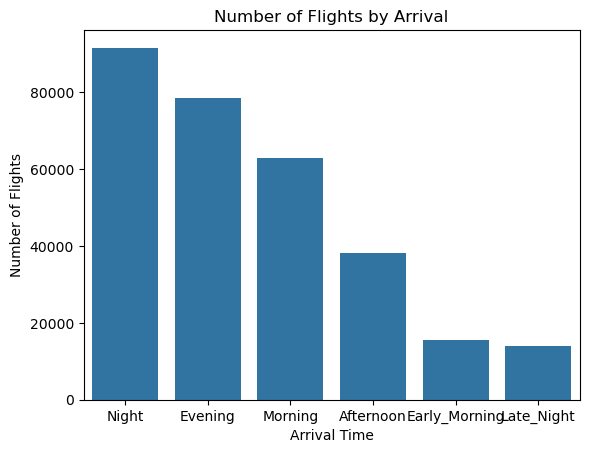

In [29]:
sns.barplot(x=arrival_counts.index, y=arrival_counts.values)
plt.xlabel('Arrival Time')
plt.ylabel('Number of Flights')
plt.title('Number of Flights by Arrival')

In [31]:
Departure_counts = df['departure_time'].value_counts()

Text(0.5, 1.0, 'Number of Flights by Departure')

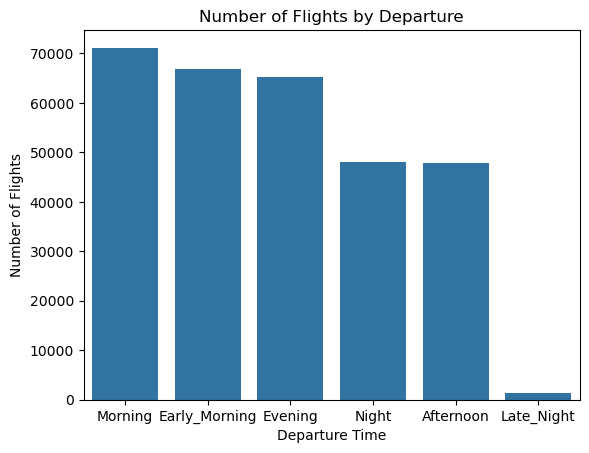

In [35]:
sns.barplot(x=Departure_counts.index, y=Departure_counts.values)
plt.xlabel('Departure Time')
plt.ylabel('Number of Flights')
plt.title('Number of Flights by Departure')

In [44]:
time_summary = pd.DataFrame({
    'Arrival': df['arrival_time'].value_counts(),
    'Departure': df['departure_time'].value_counts()
}).fillna(0)

time_summary = time_summary.reset_index().rename(columns={'index': 'Time'})

In [46]:
time_summary

,Time,Arrival,Departure
0,Afternoon,38139,47794
1,Early_Morning,15417,66790
2,Evening,78323,65102
3,Late_Night,14001,1306
4,Morning,62735,71146
5,Night,91538,48015


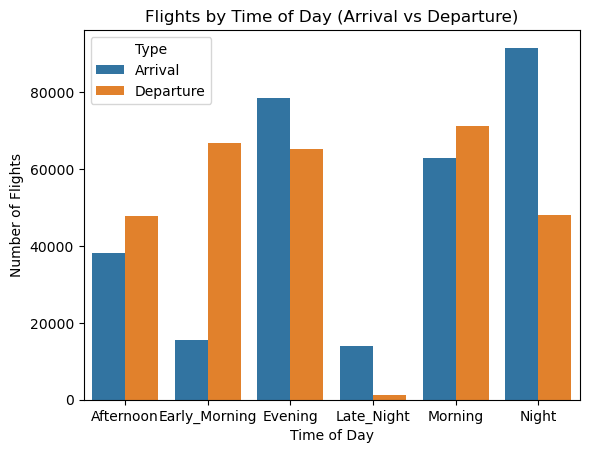

In [48]:
melted = pd.melt(time_summary, id_vars='Time', value_vars=['Arrival', 'Departure'], var_name='Type', value_name='Count')

sns.barplot(data=melted, x='Time', y='Count', hue='Type')
plt.title("Flights by Time of Day (Arrival vs Departure)")
plt.xlabel("Time of Day")
plt.ylabel("Number of Flights")
plt.show()

**Q.3. Show Bar Graphs representing the Source City & Destination City.**

In [55]:
source_city = df['source_city'].value_counts()

Text(0.5, 1.0, 'Number of Flights by Source City')

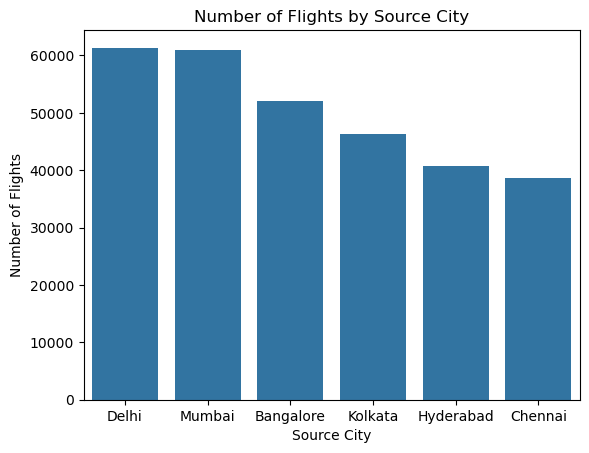

In [61]:
sns.barplot(x= source_city.index, y = source_city.values)
plt.xlabel("Source City")
plt.ylabel("Number of Flights")
plt.title('Number of Flights by Source City')

In [67]:
destination_city = df['destination_city'].value_counts()

Text(0.5, 1.0, 'Number of Flights by Destination City')

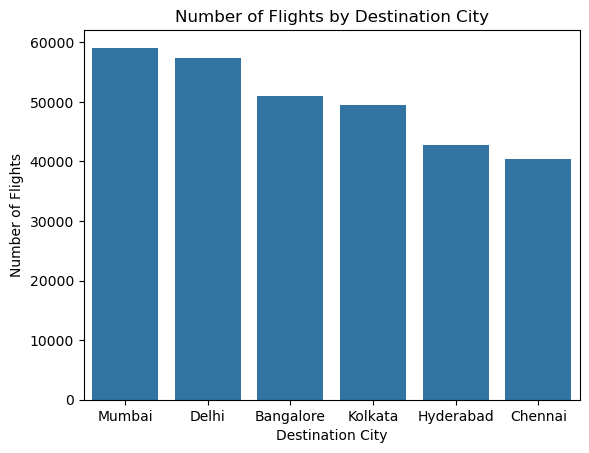

In [69]:
sns.barplot(x=destination_city.index, y = destination_city.values)
plt.xlabel("Destination City")
plt.ylabel("Number of Flights")
plt.title('Number of Flights by Destination City')

In [71]:
summary = pd.DataFrame({
    'Source': df['source_city'].value_counts(),
    'Destination': df['destination_city'].value_counts()
}).fillna(0)

In [85]:
summary= summary.reset_index().rename(columns = {'index' : 'Location'})

In [87]:
summary

,Location,Source,Destination
0,Bangalore,52061,51068
1,Chennai,38700,40368
2,Delhi,61343,57360
3,Hyderabad,40806,42726
4,Kolkata,46347,49534
5,Mumbai,60896,59097


Text(0.5, 1.0, 'Flights by Location(Source/Destination)')

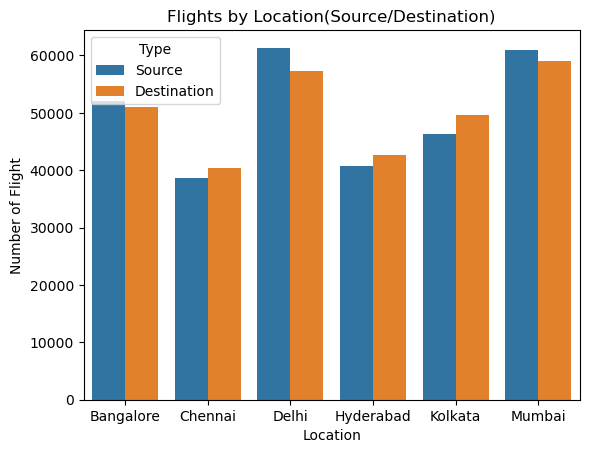

In [91]:
joined = pd.melt(summary, id_vars = 'Location', value_vars= ['Source','Destination'], var_name = 'Type', value_name = 'Count')

sns.barplot(data=joined, x='Location', y='Count', hue='Type')
plt.xlabel('Location')
plt.ylabel('Number of Flight')
plt.title('Flights by Location(Source/Destination)')

**Q.4. Does price varies with airlines ?**

In [98]:
df.groupby('airline')['price'].mean().reset_index(name = 'Average price')

,airline,Average price
0,AirAsia,4091.072742
1,Air_India,23507.019112
2,GO_FIRST,5652.007595
3,Indigo,5324.216303
4,SpiceJet,6179.278881
5,Vistara,30396.536302


**Q.5. Does ticket price change based on the departure time and arrival time?**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17360\215903469.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = departure_price, x = 'departure_time', y = 'price',  palette="viridis")


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Afternoon'),
  Text(1, 0, 'Early_Morning'),
  Text(2, 0, 'Evening'),
  Text(3, 0, 'Late_Night'),
  Text(4, 0, 'Morning'),
  Text(5, 0, 'Night')])

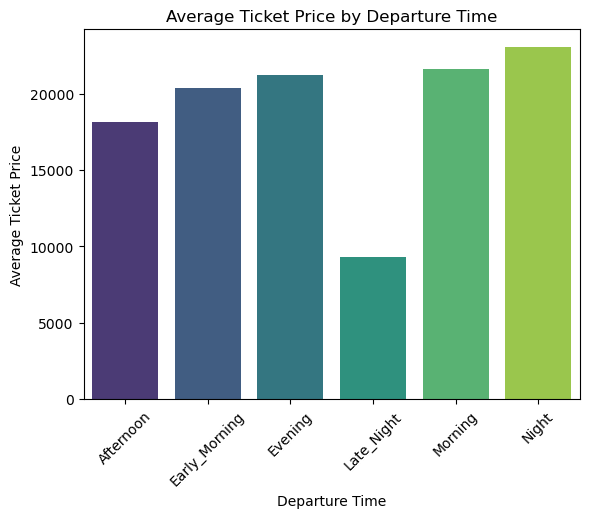

In [123]:
departure_price = df.groupby("departure_time")['price'].mean().reset_index()
sns.barplot(data = departure_price, x = 'departure_time', y = 'price',  palette="viridis")
plt.xlabel('Departure Time')
plt.ylabel('Average Ticket Price')
plt.title('Average Ticket Price by Departure Time')
plt.xticks(rotation = 45)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17360\146227009.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = arrival_price, x = 'arrival_time', y = 'price',  palette="viridis")


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Afternoon'),
  Text(1, 0, 'Early_Morning'),
  Text(2, 0, 'Evening'),
  Text(3, 0, 'Late_Night'),
  Text(4, 0, 'Morning'),
  Text(5, 0, 'Night')])

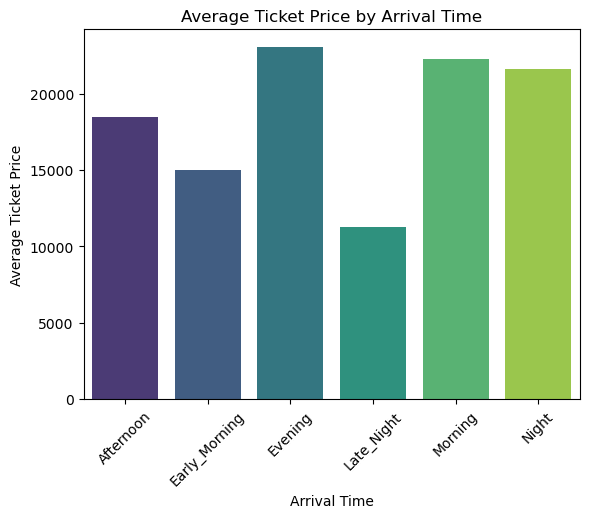

In [121]:
arrival_price = df.groupby("arrival_time")['price'].mean().reset_index()
sns.barplot(data = arrival_price, x = 'arrival_time', y = 'price',  palette="viridis")
plt.xlabel('Arrival Time')
plt.ylabel('Average Ticket Price')
plt.title('Average Ticket Price by Arrival Time')
plt.xticks(rotation = 45)

In [129]:
heatmap_data = df.pivot_table(index='departure_time', columns='arrival_time', values='price', aggfunc='mean')

In [131]:
heatmap_data

arrival_time,Afternoon,Early_Morning,Evening,Late_Night,Morning,Night
departure_time,,,,,,
Afternoon,14741.746011,21159.511401,15548.836651,10811.615662,26056.580994,19097.798757
Early_Morning,16564.731082,9540.191523,24804.077441,29638.037500,12299.838792,25792.007764
Evening,25569.672277,18175.929529,24612.547643,8547.029235,28326.216482,15641.705242
Late_Night,18520.684932,4548.700599,21217.106383,4288.291971,7104.374684,29439.811321
Morning,13271.433547,22625.786578,21636.529952,23624.505755,17548.738563,26827.897551
Night,28115.362126,12075.785461,31425.824194,6590.831766,25573.642137,17817.956009


Text(50.58159722222221, 0.5, 'Departure Time')

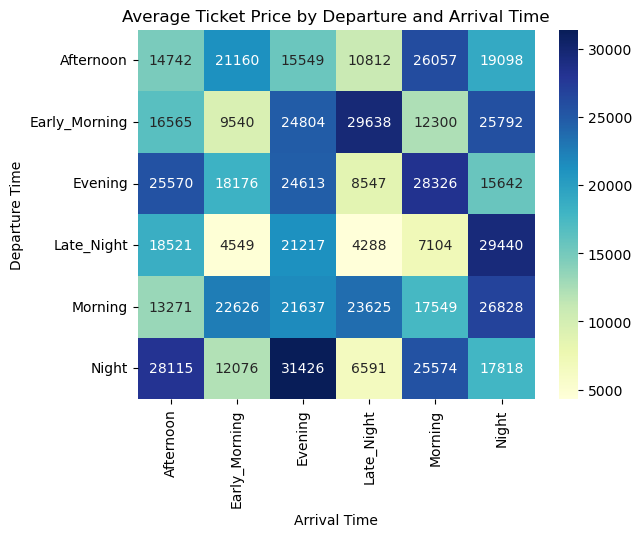

In [133]:
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Ticket Price by Departure and Arrival Time")
plt.xlabel("Arrival Time")
plt.ylabel("Departure Time")

**Q.6. How the price changes with change in Source and Destination?**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17360\797554932.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=source_price, x='source_city', y='price', palette='mako')


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Bangalore'),
  Text(1, 0, 'Chennai'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Hyderabad'),
  Text(4, 0, 'Kolkata'),
  Text(5, 0, 'Mumbai')])

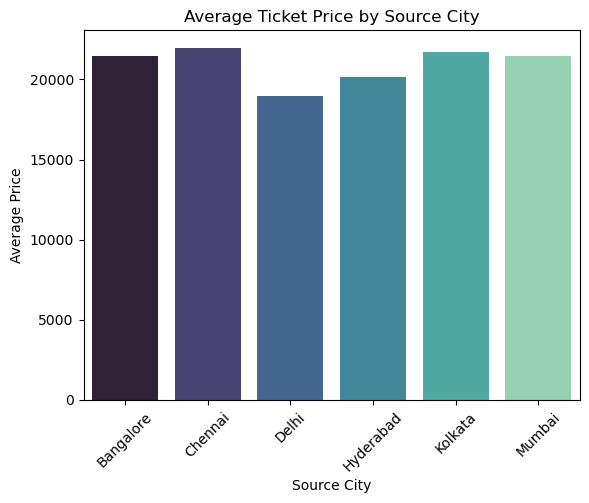

In [142]:
source_price = df.groupby('source_city')['price'].mean().reset_index()
sns.barplot(data=source_price, x='source_city', y='price', palette='mako')
plt.title("Average Ticket Price by Source City")
plt.xlabel("Source City")
plt.ylabel("Average Price")
plt.xticks(rotation=45)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17360\2772775892.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=destination_price, x='destination_city', y='price', palette='crest')


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Bangalore'),
  Text(1, 0, 'Chennai'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Hyderabad'),
  Text(4, 0, 'Kolkata'),
  Text(5, 0, 'Mumbai')])

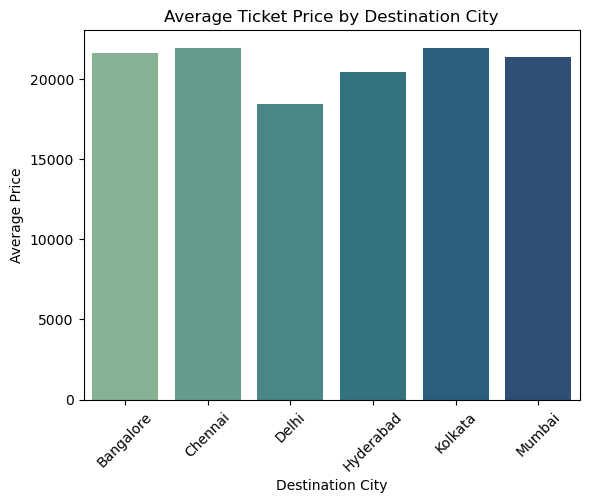

In [146]:
destination_price = df.groupby('destination_city')['price'].mean().reset_index()
sns.barplot(data=destination_price, x='destination_city', y='price', palette='crest')
plt.title("Average Ticket Price by Destination City")
plt.xlabel("Destination City")
plt.ylabel("Average Price")
plt.xticks(rotation=45)

Text(50.72222222222221, 0.5, 'Source City')

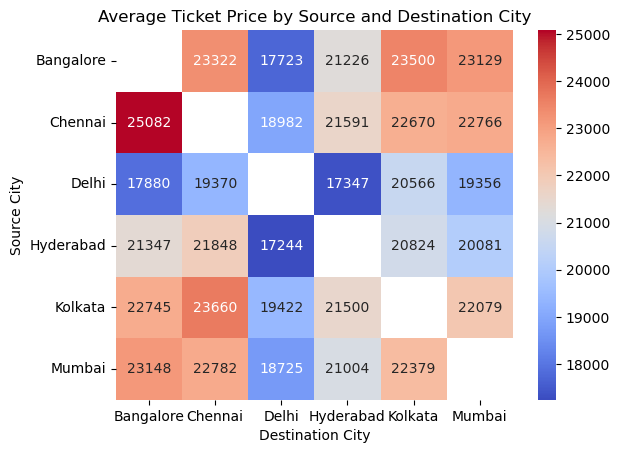

In [150]:
route_price = df.pivot_table(index='source_city', columns='destination_city', values='price', aggfunc='mean')

sns.heatmap(route_price, annot=True, fmt=".0f", cmap="coolwarm")
plt.title("Average Ticket Price by Source and Destination City")
plt.xlabel("Destination City")
plt.ylabel("Source City")

**Q.7. How is the price affected when tickets are bought in just 1 or 2 days before departure?**

In [161]:
df['Booking_Type'] = df['duration'].apply(lambda x: '1-2 Days Before' if x <= 2.0 else '3+ Days Before')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17360\3876691733.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price, x='Booking_Type', y='price', palette='Set1')


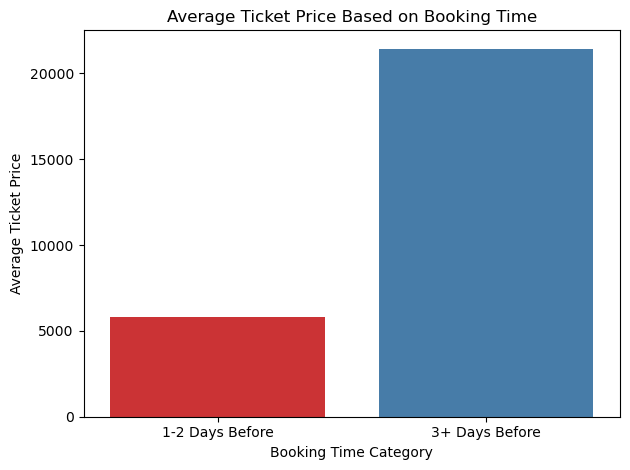

In [163]:
avg_price = df.groupby('Booking_Type')['price'].mean().reset_index()

sns.barplot(data=avg_price, x='Booking_Type', y='price', palette='Set1')
plt.title("Average Ticket Price Based on Booking Time")
plt.xlabel("Booking Time Category")
plt.ylabel("Average Ticket Price")
plt.tight_layout()
plt.show()

**Q.8. How does the ticket price vary between Economy and Business class?**

In [166]:
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Booking_Type
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,3+ Days Before
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,3+ Days Before
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,3+ Days Before
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,3+ Days Before
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,3+ Days Before


In [178]:
class_price = df.groupby("class")['price'].mean().reset_index()
class_price 

,class,price
0,Business,52540.081124
1,Economy,6572.342383


<Axes: xlabel='class', ylabel='price'>

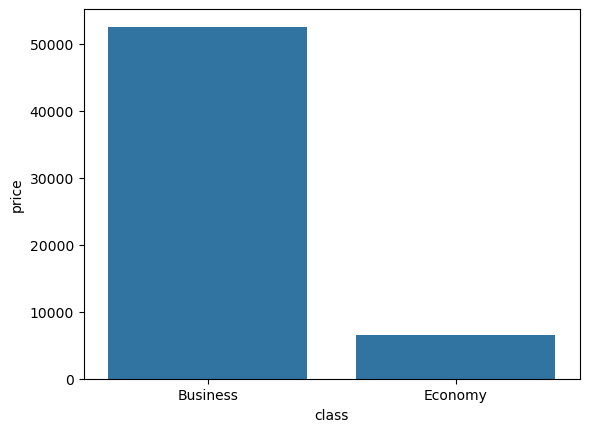

In [176]:
sns.barplot(class_price, x= 'class', y= 'price')

**Q.9. What will be the Average Price of Vistara airline for a flight from Delhi to Hyderabad in Business Class ?**

In [183]:
filtered_df = df[
    (df['airline'] == 'Vistara') &
    (df['source_city'] == 'Delhi') &
    (df['destination_city'] == 'Hyderabad') &
    (df['class'] == 'Business')
]

In [187]:
average_price = filtered_df['price'].mean()

In [191]:
print(f"Average Price: ₹{average_price:.2f}")

Average Price: ₹47939.84
